In [1]:
import matplotlib.pyplot as plt 
import numpy.random as random
import numpy as np
import copy
%matplotlib inline

In [2]:
class Gambler:
    def __init__(self, max_coins=100, ph=.4):
        self.max_coins = max_coins
        self.ph = ph
        self.states = [c for c in range(max_coins+1)]
        self.actions = [c for c in range(max_coins)]
        self.V = [0 for s in self.states]
        self.pi = [s for s in self.states]
        self.dynamics = [[{} for _ in self.actions] for _ in self.states]
        self.find_p()
    
    def find_p(self):
        for s in self.states:
            for a in self.actions:
                win_state = s+a
                lose_state = s-a
                if a <= s and s>0 and s<100 and a>0:
                    win_p = self.ph
                    lose_p = 1-self.ph
                else:
                    win_p = 0
                    lose_p = 0
                if lose_state < 0:
                    lose_state = 0
                if win_state >= 100:
                    win_state = 100
                    r = 1
                else:
                    r = 0
                try:
                    self.dynamics[s][a][tuple([win_state, r])] += win_p
                except:
                    self.dynamics[s][a][tuple([win_state, r])] = win_p
                try:
                    self.dynamics[s][a][tuple([lose_state, 0])] += lose_p
                except:
                    self.dynamics[s][a][tuple([lose_state, 0])] = lose_p

                

In [3]:
def policy_evaluation(rlprob):
    delta = np.inf
    theta = 0
    while delta > theta:
        delta = 0
        for s in rlprob.states:
            old = rlprob.V[s]
            rlprob.V[s] = 0
            for a in rlprob.actions:
                if rlprob.pi[s] == a:
                    transitions = rlprob.dynamics[s][a]
                    for transition in transitions:
                        s_ = transition[0]
                        r = transition[1]
                        p = transitions[transition]
                        rlprob.V[s] += p*(r+rlprob.V[s_])
            if delta == np.inf or abs(rlprob.V[s]-old) > delta:
                delta = abs(rlprob.V[s]-old)

def policy_improvement(rlprob):
    stable = True
    for s in rlprob.states:
        old = rlprob.pi[s]
        max_val = -np.inf
        for a in rlprob.actions:
            val = 0
            transitions = rlprob.dynamics[s][a]
            for transition in transitions:
                s_ = transition[0]
                r = transition[1]
                p = transitions[transition]
                val += p*(r+rlprob.V[s_])
            if val > max_val:
                max_val = val
                best_action = a
        rlprob.pi[s] = best_action
        if best_action != old:
            stable = False
    return stable


def policy_iteration(rlprob):
    done = False
    itera = 0
    while not done:
        print(itera)
        itera += 1
        policy_evaluation(a)
        done = policy_improvement(a)
                        

0
1
2
3
4
5


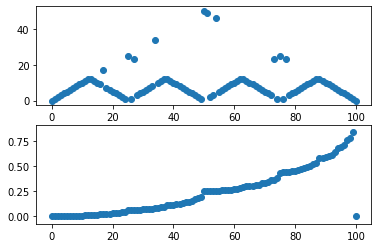

In [4]:
a = Gambler(ph=.25)
policy_iteration(a)
plt.subplot(2, 1, 1)
plt.scatter(y=a.pi, x=range(len(a.pi)))   
plt.subplot(2, 1, 2)
plt.scatter(y=a.V, x=range(len(a.V)))

0
1
2
3
4
5
6
7
8
9


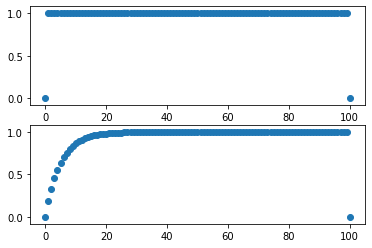

In [5]:
a = Gambler(ph=.55)
policy_iteration(a)
plt.subplot(2, 1, 1)
plt.scatter(y=a.pi, x=range(len(a.pi)))   
plt.subplot(2, 1, 2)
plt.scatter(y=a.V, x=range(len(a.V)))

0
1
2
3
4
5
6


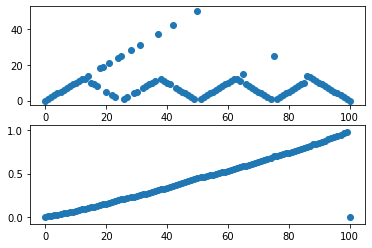

In [9]:
a = Gambler(ph=.45)
policy_iteration(a)
plt.subplot(2, 1, 1)
plt.scatter(y=a.pi, x=range(len(a.pi)))   
plt.subplot(2, 1, 2)
plt.scatter(y=a.V, x=range(len(a.V)))